Please adhere to a clear and repeatable folder structure. All file location assumptions in `uavgeo` are based on the following structure:

```
- data/
    - rgb/
        - sfm/
            - dem.tif
            - dtm.tif
            - ortho.tif
            - etc.tif
        - raw/
            - 0001.jpg
            - 0002.jpg
        - other/
            - path.geojson
            - etc.shp 
    - ms/
        - sfm/ 
            - dem.tif
            - dtm.tif
            - ortho.tif
            - etc.
        - raw/
            - 0001.jpg
            - 0002.jpg
        - other/
            - path.geojson
            - etc.shp
```

When working with training the yolov8 model using the `ultralytics` library, the structure is assumed to be the following:
```
- data/
    - yolov8/
        - train
            - images
                - 00001.jpg
                - 00002.jpg
            - labels
                - 00001.txt
                - 00002.txt 
        - test
            - images
                - 00001.jpg
                - 00002.jpg 
            - labels
                - 00001.txt
                - 00002.txt 
        - val
            - images
                - 00001.jpg
                - 00002.jpg 
            - labels
                - 00001.txt
                - 00002.txt 
        - model
            - yolo_best.pth
            - config.yaml
```
Keep this in mind as you make use of various import and export functions in `uavgeo`.


In [ ]:
#using the data download function:
import uavgeo as ug

#downloads by default into relative path from notebook to: "data"
file = ug.load.download("https://zenodo.org/record/8123870/files/ORTHOMOSAIC_230421.jpg", filename = "rgb_ortho.jpg", redownload=True)


# Adhering to the above file structure:
file = ug.load.download("https://zenodo.org/record/8123870/files/ORTHOMOSAIC_230421.jpg", output_dir = "data/rgb/sfm" filename = "ortho.jpg", redownload=True)


In [3]:
#importing sfm result files
import uavgeo as ug
ortho = ug.load.load_sfm(path_to_file = "data/ms/sfm/ortho.tif", xr_name = "ms_ortho")
dem = ug.load.load_sfm(path_to_file = "data/ms/sfm/dem.tif", xr_name = "dem")
dtm = ug.load.load_sfm(path_to_file = "data/ms/sfm/dtm.tif", xr_name = "dtm")


In [8]:
#calculating ndvi and ndwi:
import uavgeo as ug

ndvi = ug.compute.calc_ndvi(bandstack = ortho,red_id = 3, nir_id=4, rescale=False)
ndwi = ug.compute.calc_ndwi(bandstack = ortho, green_id = 2, nir_id=4, rescale=False )


In [ ]:
#calculating ndvi and ndwi:
import uavgeo as ug

dp_ortho = ug.load.start_pipe(iterable = [ortho])
dp_ortho = dp_ortho_read_from_rioxarray()
dp_ortho = dp_ortho_slice_with_xbatcher(input_dims = {"x":512, "y":512}, input_overlap={"y": 256, "x": 256})


In [1]:
# import image and label annotations from YOLO folder:
import zen3geo
import torchdata
import uavgeo as ug
import pandas as pd

labs, imgs = ug.load.load_yolo_folder(yolo_path = "data/yolov8", subset = "test")

dp_img = ug.datapipes.start_pipe(iterable = imgs)
dp_img = dp_img.read_from_rioxarray()
#dp_img = dp_img.slice_with_xbatcher(input_dims = {"x":512, "y":512}, input_overlap={"y": 256, "x": 256})

dp_labs = ug.datapipes.start_pipe(iterable = labs)
dp_labs = dp_labs.open_files(mode = "rt")
dp_labs = dp_labs.parse_csv(delimiter = " ",return_path = True)
#convert simple text stream to pandas df
dp_labs = dp_labs.parse_yolo()
#Sanity check:
print(len(list(dp_labs)), len(list(dp_img)))
#zip images together labels (IMAGES FIRST, LABELS SECOND)

#in yolo you need images with the labels to calculate the real bounding box
dp_imgs_labs = dp_labs.yolobox_to_gpd(image_datapipe = dp_img)

#clip the images and labels based on input dims and input overlap
dp_clipped = dp_imgs_labs.chip_image_and_label(input_dims = {"x":512, "y":512}, input_overlap={"y": 256, "x": 256})

2 3


C:\Users\judoj\mambaforge\envs\uavgeo\lib\site-packages\rioxarray\_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
C:\Users\judoj\mambaforge\envs\uavgeo\lib\site-packages\rioxarray\_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


In [2]:

#clip the images and labels based on input dims and input overlap
dp_save = dp_clipped.save_image_and_label(output_path = "data/yolov8/test2")
list(dp_save)

C:\Users\judoj\mambaforge\envs\uavgeo\lib\site-packages\rasterio\__init__.py:329: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\judoj\mambaforge\envs\uavgeo\lib\site-packages\rioxarray\_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
C:\Users\judoj\mambaforge\envs\uavgeo\lib\site-packages\rasterio\__init__.py:329: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\judoj\mambaforge\envs\uavgeo\lib\site-packages\rioxarray\_io.py:1132: NotGeo

[(<xarray.DataArray (band: 3, y: 512, x: 512)>
  array([[[174, 174, 174, ..., 149, 157, 148],
          [208, 208, 209, ..., 145, 142, 140],
          [220, 220, 220, ..., 151, 149, 156],
          ...,
          [207, 160, 179, ..., 113, 121, 126],
          [185, 158, 184, ..., 113, 113, 124],
          [135, 164, 215, ..., 113, 113, 121]],
  
         [[176, 176, 176, ..., 144, 151, 142],
          [210, 210, 211, ..., 140, 136, 134],
          [222, 222, 222, ..., 146, 144, 151],
          ...,
          [190, 143, 147, ..., 162, 170, 175],
          [162, 135, 152, ..., 162, 162, 173],
          [112, 141, 183, ..., 162, 162, 170]],
  
         [[148, 148, 148, ..., 122, 132, 123],
          [182, 182, 183, ..., 118, 117, 115],
          [194, 194, 194, ..., 124, 122, 129],
          ...,
          [163, 116, 123, ...,  69,  82,  87],
          [136, 109, 128, ...,  67,  69,  80],
          [ 86, 115, 159, ...,  67,  69,  77]]], dtype=uint8)
  Coordinates:
    * band         (band

In [7]:
l = list(dp_clipped)[46]
raster = l[0]
tdf = l[1]

C:\Users\judoj\mambaforge\envs\uavgeo\lib\site-packages\rioxarray\_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
C:\Users\judoj\mambaforge\envs\uavgeo\lib\site-packages\rioxarray\_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


In [8]:
tdf


,geometry,c
2,"POLYGON ((322.000 487.000, 322.000 509.000, 29...",1


In [3]:
l = list(dp_imgs_labs)[0]
raster = l[0]
tdf = l[1]

C:\Users\judoj\mambaforge\envs\uavgeo\lib\site-packages\rioxarray\_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
C:\Users\judoj\mambaforge\envs\uavgeo\lib\site-packages\rioxarray\_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


<Axes: title={'center': 'spatial_ref = 0'}, xlabel='x', ylabel='y'>

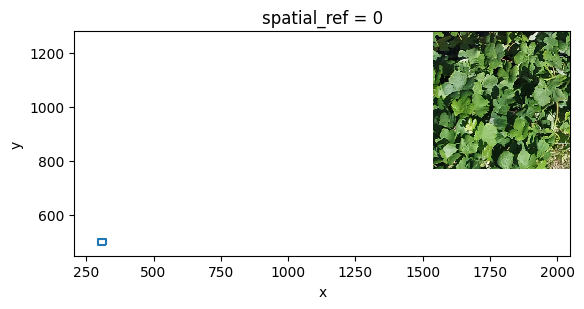

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
raster.plot.imshow(ax=ax)
tdf.boundary.plot(ax=ax)

In [18]:
## AFFINE TRANSFORMATION TIME! BOOOOOOOoooooooooohoooooo
# Convert to 0-512 coordinates for every images and every label.
# something with .transform values to figure out!
import geopandas as gpd
len(gpd.GeoDataFrame())

0

In [4]:
def convert_to_yolo_batch(boxes, img_width, img_height):
    # Calculate widths and heights
    widths = boxes[:, 2] - boxes[:, 0]
    heights = boxes[:, 3] - boxes[:, 1]

    # Calculate center points
    cx = (boxes[:, 0] + boxes[:, 2]) / 2
    cy = (boxes[:, 1] + boxes[:, 3]) / 2

    # Normalize values 
    normalized_cx = cx / img_width
    normalized_cy = cy / img_height
    normalized_w = widths / img_width
    normalized_h = heights / img_height

    # Create YOLO tensors
    yolo_tensors = torch.stack([normalized_cx, normalized_cy, normalized_w, normalized_h], dim=1)
    return yolo_tensors

In [5]:
import torch
boxs = tdf.geometry.bounds
boxs = torch.tensor(boxs.values)
convert_to_yolo_batch(boxs, raster.shape[2], raster.shape[1])

tensor([[0.6016, 0.9727, 0.0547, 0.0430]], dtype=torch.float64)

In [10]:
tdf

2    POLYGON ((322.000 487.000, 322.000 509.000, 29...
dtype: geometry

In [14]:
from rasterio import Affine
tf = raster.rio.transform()

raster = raster.rio.transform_bounds(trans)

type: CRS is invalid: None

In [37]:
tdf.affine_transform([tf.a, tf.b, tf.d,tf.e,tf.xoff,tf.yoff])

2    POLYGON ((3394.000 2023.000, 3394.000 2045.000...
dtype: geometry

In [41]:
tdf.translate(xoff = -1 * tf.xoff, yoff = -1 * tf.yoff)

2    POLYGON ((322.000 487.000, 322.000 509.000, 29...
dtype: geometry

In [12]:
from rasterio import Affine